#Lung Cancer using XGBOOST

In [1]:
!cd ..
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# rename path
!ln -s /content/gdrive/My\ Drive/ /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [4]:
path = '/mydrive/Data_Science_Projects/Lung_Cancer_using_XGBOOST/data/'

df = pd.read_csv(path + "survey_lung_cancer.csv")
print(df.shape)
df.head(10)

(309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


###Summarize dataset:
  - Gender: M(male), F(female)
  - Age: Age of the patient
  - Smoking: YES=2 , NO=1.
  - Yellow fingers: YES=2 , NO=1.
  - Anxiety: YES=2 , NO=1.
  - Peer_pressure: YES=2 , NO=1.
  - Chronic Disease: YES=2 , NO=1.
  - Fatigue: YES=2 , NO=1.
  - Allergy: YES=2 , NO=1.
  - Wheezing: YES=2 , NO=1.
  - Alcohol: YES=2 , NO=1.
  - Coughing: YES=2 , NO=1.
  - Shortness of Breath: YES=2 , NO=1.
  - Swallowing Difficulty: YES=2 , NO=1.
  - Chest pain: YES=2 , NO=1.
  - Lung Cancer: YES , NO.


##Label Encoding

In [5]:
df.rename(columns={'CHRONIC DISEASE':'CHRONIC_DISEASE','ALCOHOL CONSUMING': 'ALCOHOL_CONSUMING', 'SHORTNESS OF BREATH':'SHORTNESS_OF_BREATH', 'SWALLOWING DIFFICULTY':'SWALLOWING_DIFFICULTY', 'CHEST PAIN':'CHEST_PAIN'}, inplace = True)

In [6]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [7]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
5,0,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,1,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,0,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
8,0,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0
9,1,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


M[male] = 1 & F[female] = 0 
Lung_cancer => YES = % NO= 0 

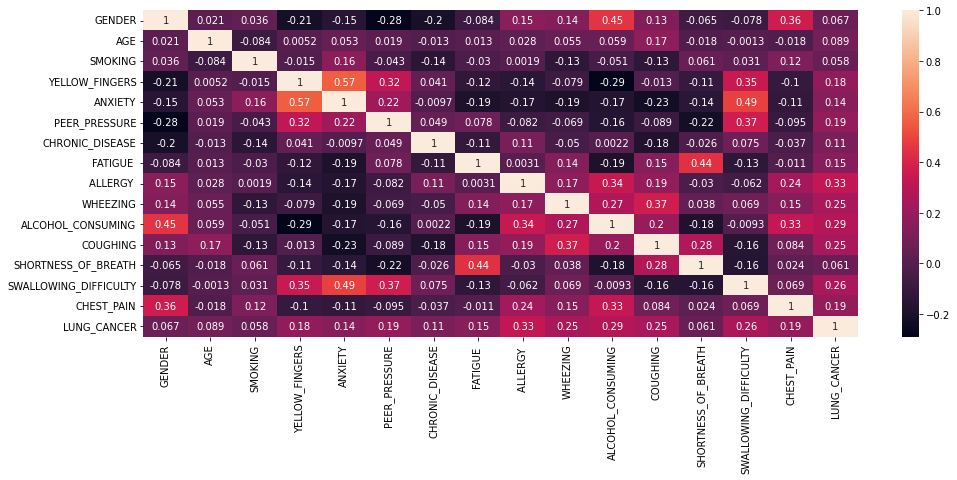

In [9]:
#correlation
corr = df.corr()

#seaborn heatmap method
plt.figure(figsize=[16,6])
sns.heatmap(data=corr, annot=True)

In [10]:
!install pandas profilling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

install: cannot stat 'pandas': No such file or directory
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [11]:
# import pandas profilling
from pandas_profiling import ProfileReport

# run profile
profile = ProfileReport(df, title = 'Report - Pandas Profilling', html={'style': {'full_width': True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# Remove column Age
df = df.drop(['AGE'], axis = 1)
df.head(10)

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,1,2,1,1,1,1,1,2,1,2,2,1,1,0
5,0,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,1,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,0,2,2,2,2,1,2,2,1,1,1,2,2,1,1
8,0,2,1,2,1,1,2,1,1,1,1,1,1,1,0
9,1,2,2,2,2,2,1,2,1,2,1,1,2,2,1


## Separate Dataset

In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [14]:
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

##Splitting dataset into train and test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

Training with XGBOOST

In [16]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

## Metrics

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 5  2]
 [ 1 23]]


0.9032258064516129

## K-Fold Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(model, X, y, cv=10)
print("Accuracy {:.2f} %".format(accuracies.mean()*100))

Accuracy 91.28 %


##Deploy

In [19]:
df.to_csv('//mydrive/Data_Science_Projects/Lung_Cancer_using_XGBOOST/data/data.csv', index=False)
model.save_model("model.json")

In [20]:
import pickle
file_name = "model.pkl"

# save
pickle.dump(model, open(file_name, "wb"))